In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


数据集中共有 20640 个实例，按照机器学习的标准这个数据量很小，但是非常适合入门。我们注意到总卧室数只有 20433 个非空值，这意味着有 207 个街区缺少这个值。我们将在后面对它进行处理。

所有的属性都是数值的，除了离大海距离这项。它的类型是对象，因此可以包含任意 Python 对象，但是因为该项是从 CSV 文件加载的，所以必然是文本类型。在刚才查看数据前五项时，你可能注意到那一列的值是重复的，意味着它可能是一项表示类别的属性。可以使用value_counts()方法查看该项中都有哪些类别，每个类别中都包含有多少个街区：

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

再来看其它字段。describe()方法展示了数值属性的概括

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


count、mean、min和max几行的意思很明显了。注意，空值被忽略了（所以，卧室总数是 20433 而不是 20640）。std是标准差（揭示数值的分散度）。25%、50%、75% 展示了对应的分位数：每个分位数指明小于这个值，且指定分组的百分比。例如，25% 的街区的房屋年龄中位数小于 18，而 50% 的小于 29，75% 的小于 37。这些值通常称为第 25 个百分位数（或第一个四分位数），中位数，第 75 个百分位数（第三个四分位数）。

另一种快速了解数据类型的方法是画出每个数值属性的柱状图。柱状图（的纵轴）展示了特定范围的实例的个数。你还可以一次给一个属性画图，或对完整数据集调用hist()方法，后者会画出每个数值属性的柱状图（见图 2-8）。例如，你可以看到略微超过 800 个街区的median_house_value值差不多等于 500000 美元。

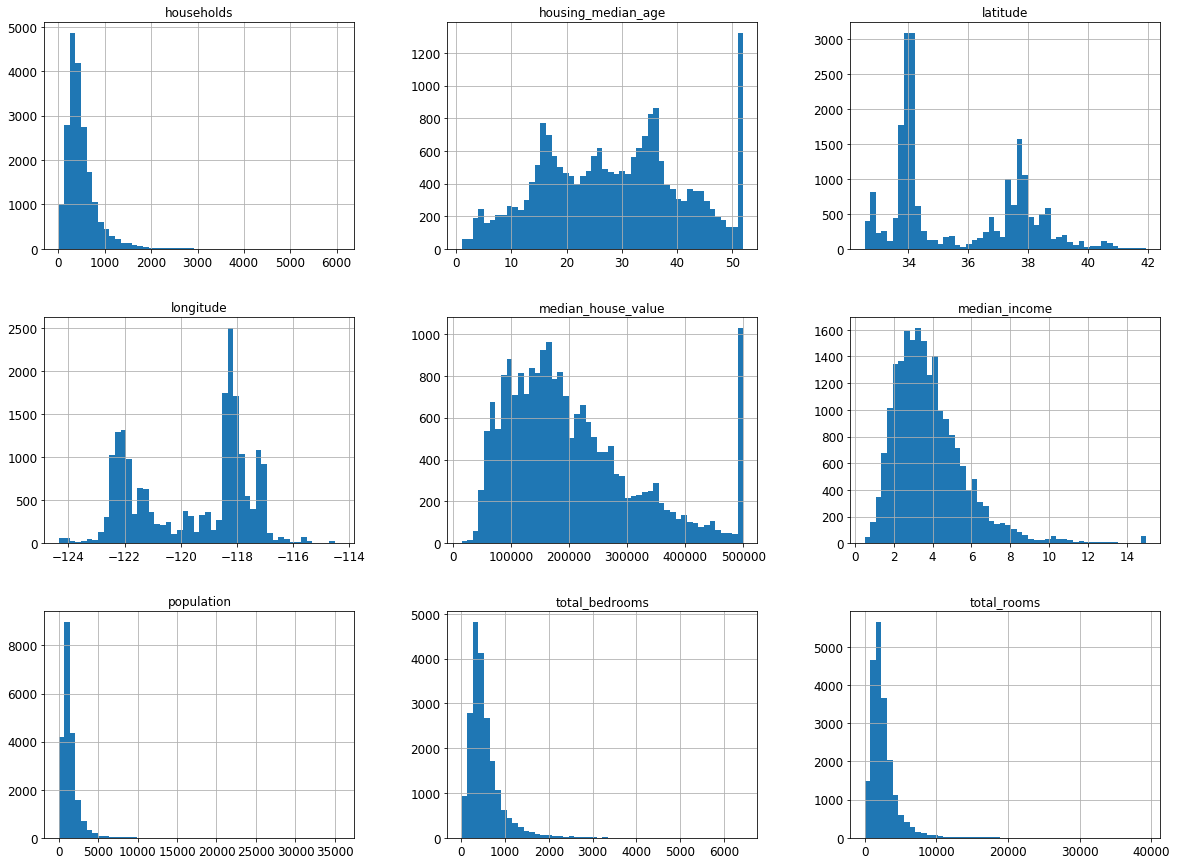

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

注意柱状图中的一些点：

首先，收入中位数貌似不是美元（USD）。与数据采集团队交流之后，你被告知数据是经过缩放调整的，过高收入中位数的会变为 15（实际为 15.0001），过低的会变为 5（实际为 0.4999）。在机器学习中对数据进行预处理很正常，这不一定是个问题，但你要明白数据是如何计算出来的。

房屋年龄中位数和房屋价值中位数也被设了上限。后者可能是个严重的问题，因为它是你的目标属性（你的标签）。你的机器学习算法可能学习到价格不会超出这个界限。你需要与下游团队核实，这是否会成为问题。如果他们告诉你他们需要明确的预测值，即使超过 500000 美元，你则有两个选项：

对于设了上限的标签，重新收集合适的标签；
将这些街区从训练集移除（也从测试集移除，因为若房价超出 500000 美元，你的系统就会被差评）。
这些属性值有不同的量度。我们会在本章后面讨论特征缩放。

最后，许多柱状图的尾巴很长：相较于左边，它们在中位数的右边延伸过远。对于某些机器学习算法，这会使检测规律变得更难些。我们会在后面尝试变换处理这些属性，使其变为正态分布。

### 创建测试集
理论上，创建测试集很简单：只要随机挑选一些实例，一般是数据集的 20%，放到一边：

In [9]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


这个方法可行，但是并不完美：如果再次运行程序，就会产生一个不同的测试集！多次运行之后，你（或你的机器学习算法）就会得到整个数据集，这是需要避免的。

解决的办法之一是保存第一次运行得到的测试集，并在随后的过程加载。另一种方法是在调用np.random.permutation()之前，设置随机数生成器的种子（比如np.random.seed(42)），以产生总是相同的洗牌指数（shuffled indices）。

但是如果数据集更新，这两个方法都会失效。一个通常的解决办法是使用每个实例的ID来判定这个实例是否应该放入测试集（假设每个实例都有唯一并且不变的ID）。例如，你可以计算出每个实例ID的哈希值，只保留其最后一个字节，如果该值小于等于 51（约为 256 的 20%），就将其放入测试集。这样可以保证在多次运行中，测试集保持不变，即使更新了数据集。新的测试集会包含新实例中的 20%，但不会有之前位于训练集的实例。下面是一种可用的方法：

但是如果数据集更新，这两个方法都会失效。一个通常的解决办法是使用每个实例的ID来判定这个实例是否应该放入测试集（假设每个实例都有唯一并且不变的ID）。例如，你可以计算出每个实例ID的哈希值，只保留其最后一个字节，如果该值小于等于 51（约为 256 的 20%），就将其放入测试集。这样可以保证在多次运行中，测试集保持不变，即使更新了数据集。新的测试集会包含新实例中的 20%，但不会有之前位于训练集的实例。下面是一种可用的方法：

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

不过，房产数据集没有ID这一列。最简单的方法是使用行索引作为 ID：

In [12]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

如果使用行索引作为唯一识别码，你需要保证新数据都放到现有数据的尾部，且没有行被删除。如果做不到，则可以用最稳定的特征来创建唯一识别码。例如，一个区的维度和经度在几百万年之内是不变的，所以可以将两者结合成一个 ID：

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn 提供了一些函数，可以用多种方式将数据集分割成多个子集。最简单的函数是train_test_split，它的作用和之前的函数split_train_test很像，并带有其它一些功能。首先，它有一个random_state参数，可以设定前面讲过的随机生成器种子；第二，你可以将种子传递给多个行数相同的数据集，可以在相同的索引上分割数据集（这个功能非常有用，比如你的标签值是放在另一个DataFrame里的）：

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


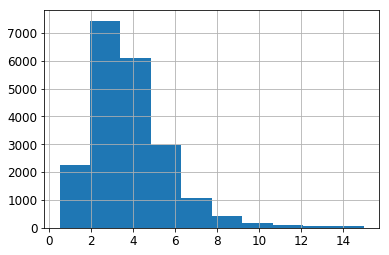

In [16]:
housing["median_income"].hist()

大多数的收入中位数的值聚集在 2-5（万美元），但是一些收入中位数会超过 6。数据集中的每个分层都要有足够的实例位于你的数据中，这点很重要。否则，对分层重要性的评估就会有偏差。这意味着，你不能有过多的分层，且每个分层都要足够大。后面的代码通过将收入中位数除以 1.5（以限制收入分类的数量），创建了一个收入类别属性，用ceil对值舍入（以产生离散的分类），然后将所有大于 5的分类归入到分类 5：

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

现在，就可以根据收入分类，进行分层采样。你可以使用 Scikit-Learn 的StratifiedShuffleSplit类：

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2020)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

检查下结果是否符合预期。你可以在完整的房产数据集中查看收入分类比例：

In [21]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [22]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

使用相似的代码，还可以测量测试集中收入分类的比例。图 2-10 对比了总数据集、分层采样的测试集、纯随机采样测试集的收入分类比例。可以看到，分层采样测试集的收入分类比例与总数据集几乎相同，而随机采样数据集偏差严重。

In [23]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [24]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


上图为分层采样和纯随机采样的样本偏差比较

现在，你需要删除income_cat属性，使数据回到初始状态：

In [25]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

### 数据探索和可视化、发现规律

目前为止，你只是快速查看了数据，对要处理的数据有了整体了解。现在的目标是更深的探索数据。

首先，保证你将测试集放在了一旁，只是研究训练集。另外，如果训练集非常大，你可能需要再采样一个探索集，保证操作方便快速。在我们的案例中，数据集很小，所以可以在全集上直接工作。创建一个副本，以免损伤训练集：

In [26]:
housing = strat_train_set.copy()

地理数据可视化
因为存在地理信息（纬度和经度），创建一个所有街区的散点图来数据可视化是一个不错的主意:

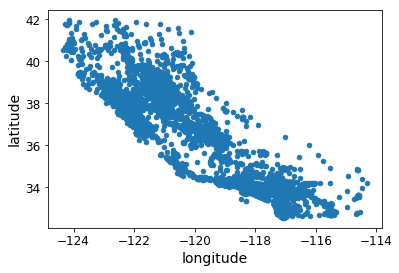

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude")

这张图看起来很像加州，但是看不出什么特别的规律。将alpha设为 0.1，可以更容易看出数据点的密度：

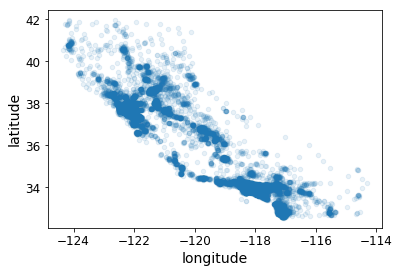

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

通常来讲，人类的大脑非常善于发现图片中的规律，但是需要调整可视化参数使规律显现出来。

现在来看房价。每个圈的半径表示街区的人口（选项s），颜色代表价格（选项c）。我们用预先定义的名为jet的颜色图（选项cmap），它的范围是从蓝色（低价）到红色（高价）：

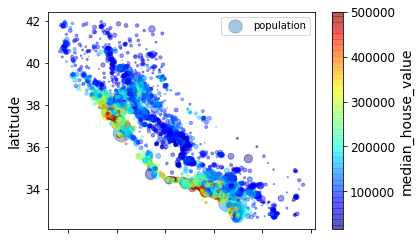

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

这张图说明房价和位置（比如，靠海）和人口密度联系密切，这点你可能早就知道。可以使用聚类算法来检测主要的聚集，用一个新的特征值测量聚集中心的距离。尽管北加州海岸区域的房价不是非常高，但离大海距离属性也可能很有用，所以这不是用一个简单的规则就可以定义的问题。

**查找关联
因为数据集并不是非常大，你可以很容易地使用corr()方法计算出每对属性间的标准相关系数（standard correlation coefficient，也称作皮尔逊相关系数）：**

In [30]:
corr_matrix = housing.corr()

现在来看下每个属性和房价中位数的关联度：

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688929
total_rooms           0.132029
housing_median_age    0.104036
households            0.066047
total_bedrooms        0.049387
population           -0.024635
longitude            -0.045222
latitude             -0.145759
Name: median_house_value, dtype: float64

**相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；例如，当收入中位数增加时，房价中位数也会增加。当相关系数接近 -1 时，意味强负相关；你可以看到，纬度和房价中位数有轻微的负相关性（即，越往北，房价越可能降低）。**

另一种检测属性间相关系数的方法是使用 Pandas 的scatter_matrix函数，它能画出每个数值属性对每个其它数值属性的图。因为现在共有 11 个数值属性，你可以得到11 ** 2 = 121张图，在一页上画不下，所以只关注几个和房价中位数最有可能相关的属性（图 2-15）：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA69C12588>,
      dtype=object)

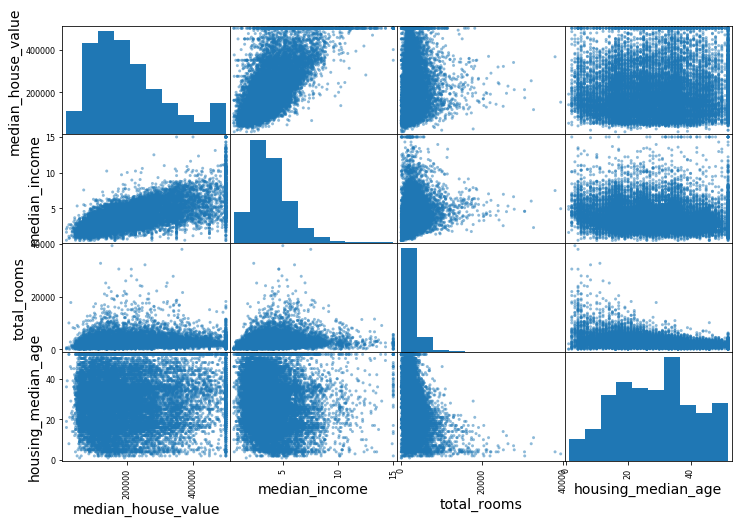

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

最有希望用来预测房价中位数的属性是收入中位数，因此将这张图放大（图 2-16）：

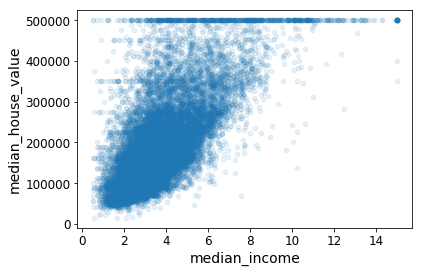

In [33]:
housing.plot(kind="scatter", x="median_income",y="median_house_value",
             alpha=0.1)

这张图说明了几点。首先，相关性非常高；可以清晰地看到向上的趋势，并且数据点不是非常分散。第二，我们之前看到的最高价，清晰地呈现为一条位于 500000 美元的水平线。这张图也呈现了一些不是那么明显的直线：一条位于 450000 美元的直线，一条位于 350000 美元的直线，一条在 280000 美元的线，和一些更靠下的线。你可能希望去除对应的街区，以防止算法重复这些巧合。

属性组合试验

希望前面的一节能教给你一些探索数据、发现规律的方法。你发现了一些数据的巧合，需要在给算法提供数据之前，将其去除。你还发现了一些属性间有趣的关联，特别是目标属性。你还注意到一些属性具有长尾分布，因此你可能要将其进行转换（例如，计算其log对数）。当然，不同项目的处理方法各不相同，但大体思路是相似的。

给算法准备数据之前，你需要做的最后一件事是尝试多种属性组合。例如，如果你不知道某个街区有多少户，该街区的总房间数就没什么用。你真正需要的是每户有几个房间。相似的，总卧室数也不重要：你可能需要将其与房间数进行比较。每户的人口数也是一个有趣的属性组合。让我们来创建这些新的属性：

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688929
rooms_per_household         0.161417
total_rooms                 0.132029
housing_median_age          0.104036
households                  0.066047
total_bedrooms              0.049387
population_per_household   -0.022106
population                 -0.024635
longitude                  -0.045222
latitude                   -0.145759
bedrooms_per_room          -0.252314
Name: median_house_value, dtype: float64

看起来不错！与总房间数或卧室数相比，新的bedrooms_per_room属性与房价中位数的关联更强。显然，卧室数/总房间数的比例越低，房价就越高。每户的房间数也比街区的总房间数的更有信息，很明显，房屋越大，房价就越高。

这一步的数据探索不必非常完备，此处的目的是有一个正确的开始，快速发现规律，以得到一个合理的原型。但是这是一个交互过程：一旦你得到了一个原型，并运行起来，你就可以分析它的输出，进而发现更多的规律，然后再回到数据探索这步。

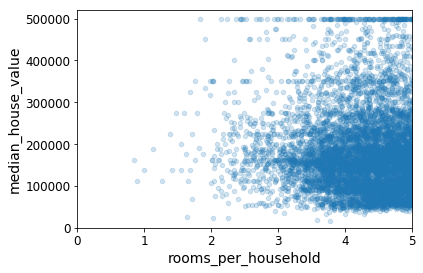

In [36]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [37]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000
mean,-119.570776,35.632071,28.675388,2642.625363,538.633966,1430.400557,500.435017,3.870040,207198.501756,5.414646,0.213022,3.104149
std,2.002874,2.131819,12.598605,2211.664017,425.987473,1153.024747,386.181755,1.893136,115695.523794,2.247773,0.058333,11.594053
min,-124.350000,32.550000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1449.000000,296.000000,787.000000,280.000000,2.564375,119300.000000,4.442934,0.175445,2.431797
50%,-118.500000,34.260000,29.000000,2122.000000,433.500000,1165.000000,408.500000,3.538750,179550.000000,5.233333,0.203159,2.822614
75%,-118.010000,37.710000,37.000000,3144.000000,647.000000,1729.000000,605.000000,4.747275,265700.000000,6.053438,0.239571,3.285271
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,132.533333,1.000000,1243.333333


### 为机器学习算法准备数据

现在来为机器学习算法准备数据。不要手工来做，你需要写一些函数，理由如下：

函数可以让你在任何数据集上（比如，你下一次获取的是一个新的数据集）方便地进行重复数据转换。

你能慢慢建立一个转换函数库，可以在未来的项目中复用。

在将数据传给算法之前，你可以在实时系统中使用这些函数。

这可以让你方便地尝试多种数据转换，查看哪些转换方法结合起来效果最好。

但是，还是先回到干净的训练集（通过再次复制strat_train_set），将预测量和标签分开，因为我们不想对预测量和目标值应用相同的转换（注意drop()创建了一份数据的备份，而不影响strat_train_set）：

In [38]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### 数据清洗
大多机器学习算法不能处理缺失的特征，因此先创建一些函数来处理特征缺失的问题。前面，你应该注意到了属性total_bedrooms有一些缺失值。有三个解决选项：

* 去掉对应的街区；

* 去掉整个属性；

* 进行赋值（0、平均值、中位数等等）。

用DataFrame的dropna()，drop()，和fillna()方法，可以方便地实现：

In [39]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,NaN,490.0,130.0,3.6389,<1H OCEAN
11441,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679,<1H OCEAN
20125,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,<1H OCEAN


In [40]:
housing.dropna(subset=["total_bedrooms"])    # 选项1
housing.drop("total_bedrooms", axis=1)       # 选项2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)     # 选项3

13143     254.0
4017      744.0
1408      972.0
20076     310.0
8724      247.0
3887      796.0
4053      667.0
17480     375.0
5608      412.0
10113     431.0
8560      584.0
16302     730.0
10087     338.0
8922      582.0
2122     1670.0
2635      283.0
18218     813.0
20327     984.0
10680     499.0
5147      346.0
5125      584.0
19882     621.0
16649     716.0
9818      191.0
9493      296.0
8089      199.0
12078     146.0
19996     373.0
19505     387.0
17752    1163.0
          ...  
4876      550.0
3277      557.0
17589     811.0
13058    1369.0
1472      436.0
5157      538.0
12652     901.0
7396      163.0
16410      78.0
16827     658.0
11139     365.0
9040     4171.0
3442      497.0
9902      303.0
13582     612.0
1413      234.0
4341      651.0
5351      268.0
2914     1116.0
1190      735.0
9373      324.0
71        297.0
11335     358.0
6325      468.0
7531      393.0
19192     303.0
5571      340.0
10292     283.0
12920     245.0
5221      342.0
Name: total_bedrooms, Le

In [41]:
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9149,-118.50,34.46,17.0,10267.0,433.5,4956.0,1483.0,5.5061,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.5,1145.0,480.0,6.3580,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,433.5,490.0,130.0,3.6389,<1H OCEAN
11441,-117.98,33.73,18.0,3833.0,433.5,2192.0,996.0,3.4679,<1H OCEAN
20125,-118.80,34.41,45.0,1610.0,433.5,1148.0,347.0,2.7000,<1H OCEAN


如果选择选项 3，你需要计算训练集的中位数，用中位数填充训练集的缺失值，不要忘记保存该中位数。后面用测试集评估系统时，需要替换测试集中的缺失值，也可以用来实时替换新数据中的缺失值。

Scikit-Learn 提供了一个方便的类来处理缺失值：Imputer。下面是其使用方法：首先，需要创建一个Imputer实例，指定用某属性的中位数来替换该属性所有的缺失值：

In [42]:
from sklearn.impute import SimpleImputer as Imputer

imputer = Imputer(strategy="median")

因为只有数值属性才能算出中位数，我们需要创建一份不包括文本属性ocean_proximity的数据副本：

In [43]:
housing_num = housing.drop("ocean_proximity", axis=1)

现在，就可以用fit()方法将imputer实例拟合到训练数据：

In [44]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

imputer计算出了每个属性的中位数，并将结果保存在了实例变量statistics_中。虽然此时只有属性total_bedrooms存在缺失值，但我们不能确定在以后的新的数据中会不会有其他属性也存在缺失值，所以安全的做法是将imputer应用到每个数值：

In [45]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2122.     ,  433.5    ,
       1165.     ,  408.5    ,    3.53875])

In [46]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2122.     ,  433.5    ,
       1165.     ,  408.5    ,    3.53875])

现在，你就可以使用这个“训练过的”imputer来对训练集进行转换，将缺失值替换为中位数：

In [47]:
X = imputer.transform(housing_num)

结果是一个包含转换后特征的普通的 Numpy 数组。如果你想将其放回到 PandasDataFrame中，也很简单：

In [48]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Scikit-Learn 设计

Scikit-Learn 设计的 API 设计的非常好。它的主要设计原则是：

一致性：所有对象的接口一致且简单：

估计器（estimator）。任何可以基于数据集对一些参数进行估计的对象都被称为估计器（比如，imputer就是个估计器）。估计本身是通过fit()方法，只需要一个数据集作为参数（对于监督学习算法，需要两个数据集；第二个数据集包含标签）。任何其它用来指导估计过程的参数都被当做超参数（比如imputer的strategy），并且超参数要被设置成实例变量（通常通过构造器参数设置）。
转换器（transformer）。一些估计器（比如imputer）也可以转换数据集，这些估计器被称为转换器。API也是相当简单：转换是通过transform()方法，被转换的数据集作为参数。返回的是经过转换的数据集。转换过程依赖学习到的参数，比如imputer的例子。所有的转换都有一个便捷的方法fit_transform()，等同于调用fit()再transform()（但有时fit_transform()经过优化，运行的更快）。
预测器（predictor）。最后，一些估计器可以根据给出的数据集做预测，这些估计器称为预测器。例如，上一章的LinearRegression模型就是一个预测器：它根据一个国家的人均 GDP 预测生活满意度。预测器有一个predict()方法，可以用新实例的数据集做出相应的预测。预测器还有一个score()方法，可用于评估测试集（如果是监督学习算法的话，还要给出相应的标签）的预测质量。
可检验。所有估计器的超参数都可以通过实例的public变量直接访问（比如，imputer.strategy），并且所有估计器学习到的参数也可以通过在实例变量名后加下划线来访问（比如，imputer.statistics_）。

类不可扩散。数据集被表示成 NumPy 数组或 SciPy 稀疏矩阵，而不是自制的类。超参数只是普通的 Python 字符串或数字。

可组合。尽可能使用现存的模块。例如，用任意的转换器序列加上一个估计器，就可以做成一个流水线，后面会看到例子。

合理的默认值。Scikit-Learn 给大多数参数提供了合理的默认值，很容易就能创建一个系统。

#### 处理文本和类别属性
前面，我们丢弃了类别属性ocean_proximity，因为它是一个文本属性，不能计算出中位数。大多数机器学习算法更喜欢和数字打交道，所以让我们把这些文本标签转换为数字。

Scikit-Learn 为这个任务提供了一个转换器LabelEncoder：

In [49]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13143,INLAND
4017,<1H OCEAN
1408,NEAR BAY
20076,INLAND
8724,<1H OCEAN
3887,<1H OCEAN
4053,<1H OCEAN
17480,NEAR OCEAN
5608,<1H OCEAN
10113,<1H OCEAN


In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 0, 3, ..., 0, 1, 0])

好了一些，现在就可以在任何 ML 算法里用这个数值数据了。你可以查看映射表，编码器是通过属性classes_来学习的（<1H OCEAN被映射为 0，INLAND被映射为 1，等等）：

In [52]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


在原书中使用LabelEncoder转换器来转换文本特征列的方式是错误的，该转换器只能用来转换标签（正如其名）。在这里使用LabelEncoder没有出错的原因是该数据只有一列文本特征值，在有多个文本特征列的时候就会出错。应使用factorize()方法来进行操作：

housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

In [56]:
housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

这种做法的问题是，ML 算法会认为两个临近的值比两个疏远的值要更相似。显然这样不对（比如，分类 0 和分类 4 就比分类 0 和分类 1 更相似）。要解决这个问题，一个常见的方法是给每个分类创建一个二元属性：当分类是<1H OCEAN，该属性为 1（否则为 0），当分类是INLAND，另一个属性等于 1（否则为 0），以此类推。这称作独热编码（One-Hot Encoding），因为只有一个属性会等于 1（热），其余会是 0（冷）。

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

注意输出结果是一个 SciPy 稀疏矩阵，而不是 NumPy 数组。当类别属性有数千个分类时，这样非常有用。经过独热编码，我们得到了一个有数千列的矩阵，这个矩阵每行只有一个 1，其余都是 0。使用大量内存来存储这些 0 非常浪费，所以稀疏矩阵只存储非零元素的位置。你可以像一个 2D 数据那样进行使用，但是如果你真的想将其转变成一个（密集的）NumPy 数组，只需调用toarray()方法：

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

**使用类LabelBinarizer，我们可以用一步执行这两个转换（从文本分类到整数分类，再从整数分类到独热向量）：
或使用 cat_encoder = OneHotEncoder(sparse=False)**

In [62]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

**注意默认返回的结果是一个密集 NumPy 数组。向构造器LabelBinarizer传递sparse_output=True，就可以得到一个稀疏矩阵。
但是
在原书中使用LabelBinarizer的方式也是错误的，该类也应用于标签列的转换。正确做法是使用sklearn即将提供的CategoricalEncoder类。**

### 特征缩放

数据要做的最重要的转换之一是特征缩放。除了个别情况，当输入的数值属性量度不同时，机器学习算法的性能都不会好。这个规律也适用于房产数据：总房间数分布范围是 6 到 39320，而收入中位数只分布在 0 到 15。注意通常情况下我们不需要对目标值进行缩放。

有两种常见的方法可以让所有的属性有相同的量度：线性函数归一化（Min-Max scaling）和标准化（standardization）。

线性函数归一化（许多人称其为归一化（normalization））很简单：值被转变、重新缩放，直到范围变成 0 到 1。我们通过减去最小值，然后再除以最大值与最小值的差值，来进行归一化。Scikit-Learn 提供了一个转换器MinMaxScaler来实现这个功能。它有一个超参数feature_range，可以让你改变范围，如果不希望范围是 0 到 1。

标准化就很不同：首先减去平均值（所以标准化值的平均值总是 0），然后除以方差，使得到的分布具有单位方差。与归一化不同，标准化不会限定值到某个特定的范围，这对某些算法可能构成问题（比如，神经网络常需要输入值得范围是 0 到 1）。但是，标准化受到异常值的影响很小。例如，假设一个街区的收入中位数由于某种错误变成了100，归一化会将其它范围是 0 到 15 的值变为 0-0.15，但是标准化不会受什么影响。Scikit-Learn 提供了一个转换器StandardScaler来进行标准化。

-- 警告：与所有的转换一样，缩放器只能向训练集拟合，而不是向完整的数据集（包括测试集）。只有这样，你才能用缩放器转换训练集和测试集（和新数据）。

In [63]:
from sklearn.preprocessing import FunctionTransformer

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

### 转换流水线

你已经看到，存在许多数据转换步骤，需要按一定的顺序执行。幸运的是，Scikit-Learn 提供了类Pipeline，来进行这一系列的转换。下面是一个数值属性的小流水线：

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [65]:
housing_num_tr

array([[-0.98322883,  1.24682673,  1.45453937, ..., -0.69419568,
        -0.73137471, -0.53269836],
       [ 0.48470644, -0.69523534, -0.05360975, ...,  0.22775521,
         0.50383239,  1.19908425],
       [-1.24286364,  1.08264274, -0.76799617, ...,  0.40381921,
         1.01655986, -0.70955318],
       ...,
       [ 0.87915163, -0.82189156, -0.76799617, ..., -0.45655265,
        -0.57341322,  2.83277266],
       [-0.86839036,  1.42039267, -0.21236229, ..., -0.58925113,
        -0.60448761,  0.45854434],
       [ 0.66445361, -0.78905476, -0.60924363, ..., -0.22845003,
        -0.4931377 , -1.5314949 ]])

In [66]:
from sklearn.compose import ColumnTransformer
num_attrs = list(housing_num)
cat_attrs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attrs),
    ("cat", OneHotEncoder(), cat_attrs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [67]:
housing_prepared

array([[-0.98322883,  1.24682673,  1.45453937, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48470644, -0.69523534, -0.05360975, ...,  0.        ,
         0.        ,  0.        ],
       [-1.24286364,  1.08264274, -0.76799617, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.87915163, -0.82189156, -0.76799617, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86839036,  1.42039267, -0.21236229, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66445361, -0.78905476, -0.60924363, ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
housing_prepared.shape

(16512, 13)

Pipeline构造器需要一个定义步骤顺序的名字/估计器对的列表。除了最后一个估计器，其余都要是转换器（即，它们都要有fit_transform()方法）。名字可以随意起。

当你调用流水线的fit()方法，就会对所有转换器顺序调用fit_transform()方法，将每次调用的输出作为参数传递给下一个调用，一直到最后一个估计器，它只执行fit()方法。

流水线暴露相同的方法作为最终的估计器。在这个例子中，最后的估计器是一个StandardScaler，它是一个转换器，因此这个流水线有一个transform()方法，可以顺序对数据做所有转换（它还有一个fit_transform方法可以使用，就不必先调用fit()再进行transform()）。

如果不需要手动将PandasDataFrame中的数值列转成Numpy数组的格式，而可以直接将DataFrame输入pipeline中进行处理就好了。Scikit-Learn 没有工具来处理 PandasDataFrame，因此我们需要写一个简单的自定义转换器来做这项工作：

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

每个子流水线都以一个选择转换器开始：通过选择对应的属性（数值或分类）、丢弃其它的，来转换数据，并将输出DataFrame转变成一个 NumPy 数组。这样，你就可以很简单的写出一个以PandasDataFrame为输入并且可以处理数值的流水线： 该流水线从DataFrameSelector开始获取数值属性，前面讨论过的其他数据处理步骤紧随其后。 并且你也可以通过使用DataFrameSelector选择类别属性并为其写另一个流水线然后应用LabelBinarizer.

你现在就有了一个对数值的流水线，你还需要对分类值应用LabelBinarizer：如何将这些转换写成一个流水线呢？Scikit-Learn 提供了一个类FeatureUnion实现这个功能。你给它一列转换器（可以是所有的转换器），当调用它的transform()方法，每个转换器的transform()会被并行执行，等待输出，然后将输出合并起来，并返回结果（当然，调用它的fit()方法就会调用每个转换器的fit()）。一个完整的处理数值和类别属性的流水线如下所示：

In [71]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [72]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [73]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.98322883,  1.24682673,  1.45453937, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48470644, -0.69523534, -0.05360975, ...,  0.        ,
         0.        ,  0.        ],
       [-1.24286364,  1.08264274, -0.76799617, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.87915163, -0.82189156, -0.76799617, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86839036,  1.42039267, -0.21236229, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66445361, -0.78905476, -0.60924363, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
np.allclose(housing_prepared, old_housing_prepared)

True

### 选择并训练模型

可到这一步了！你在前面限定了问题、获得了数据、探索了数据、采样了一个测试集、写了自动化的转换流水线来清理和为算法准备数据。现在，你已经准备好选择并训练一个机器学习模型了。

**在训练集上训练和评估**  
好消息是基于前面的工作，接下来要做的比你想的要简单许多。像前一章那样，我们先来训练一个线性回归模型：

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

完毕！你现在就有了一个可用的线性回归模型。用一些训练集中的实例做下验证：

In [77]:
some_data = housing.iloc[:5]
some_lables = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_lables))

Predictions:	 [139565.94405092 328402.66312021 197259.25886482  79730.09935791
 313507.83807847]
Labels:		 [92500.0, 361900.0, 235700.0, 128100.0, 343400.0]


行的通，尽管预测并不怎么准确（比如，第二个预测偏离了 50%！）。使用 Scikit-Learn 的mean_squared_error函数，用全部训练集来计算下这个回归模型的 RMSE：


In [78]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

68867.53664349884

OK，有总比没有强，但显然结果并不好：大多数街区的median_housing_values位于 120000 到 265000 美元之间，因此预测误差 68628 美元不能让人满意。这是一个模型欠拟合训练数据的例子。当这种情况发生时，意味着特征没有提供足够多的信息来做出一个好的预测，或者模型并不强大。就像前一章看到的，修复欠拟合的主要方法是选择一个更强大的模型，给训练算法提供更好的特征，或去掉模型上的限制。这个模型还没有正则化，所以排除了最后一个选项。你可以尝试添加更多特征（比如，人口的对数值），但是首先让我们尝试一个更为复杂的模型，看看效果。

来训练一个DecisionTreeRegressor。这是一个强大的模型，可以发现数据中复杂的非线性关系（决策树会在第 6 章详细讲解）。代码看起来很熟悉：

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

现在模型就训练好了，用训练集评估下：

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

...等一下，发生了什么？没有误差？这个模型可能是绝对完美的吗？当然，更大可能性是这个模型严重过拟合数据。如何确定呢？如前所述，直到你准备运行一个具备足够信心的模型，都不要碰测试集，因此你需要使用训练集的部分数据来做训练，用一部分来做模型验证。



**使用交叉验证做更佳的评估**


评估决策树模型的一种方法是用函数train_test_split来分割训练集，得到一个更小的训练集和一个验证集，然后用更小的训练集来训练模型，用验证集来评估。这需要一定工作量，并不难而且也可行。

另一种更好的方法是使用 Scikit-Learn 的交叉验证功能。下面的代码采用了 K 折交叉验证（K-fold cross-validation）：它随机地将训练集分成十个不同的子集，成为“折”，然后训练评估决策树模型 10 次，每次选一个不用的折来做评估，用其它 9 个来做训练。结果是一个包含 10 个评分的数组：

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

**警告：Scikit-Learn 交叉验证功能期望的是效用函数（越大越好）而不是损失函数（越低越好），因此得分函数实际上与 MSE 相反（即负值），这就是为什么前面的代码在计算平方根之前先计算-scores。**

In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [67416.32560911 64889.64889575 66729.77184458 65793.62152664
 68328.76328091 71028.26223252 72805.53592593 71207.83581583
 65569.59502913 66120.68479776]
Mean: 67989.00449581679
Standard deviation: 2619.0814012152287


现在决策树就不像前面看起来那么好了。实际上，它看起来比线性回归模型还糟！注意到交叉验证不仅可以让你得到模型性能的评估，还能测量评估的准确性（即，它的标准差）。决策树的评分大约是 71200，通常波动有 ±3200。如果只有一个验证集，就得不到这些信息。但是交叉验证的代价是训练了模型多次，不可能总是这样。



让我们计算下线性回归模型的的相同分数，以做确保：



In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68313.39278904 68057.92688391 68490.750842   72051.55769909
 67571.20111328 66136.9614342  71712.2529536  71729.63281415
 68066.00093106 68625.7349019 ]
Mean: 69075.54123622196
Standard deviation: 1921.7518473275102


判断没错：决策树模型过拟合很严重，它的性能比线性回归模型还差。



svm尝试一下。。。

In [86]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111687.64238180175

In [87]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [109943.72893929 112387.86790312 111955.42142852 112291.29759818
 110615.28582333 108658.81207263 116388.9331787  118852.10412311
 112675.51650262 109322.19534649]
Mean: 112309.11629159954
Standard deviation: 3007.1913922072526


现在再尝试最后一个模型：RandomForestRegressor。第7章我们会看到，随机森林是通过用特征的随机子集训练许多决策树。在其它多个模型之上建立模型称为集成学习（Ensemble Learning），它是推进 ML 算法的一种好方法。我们会跳过大部分的代码，因为代码本质上和其它模型一样：



In [88]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(svm_mse)
forest_rmse

C:\PyDev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


111687.64238180175

In [89]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48812.4155864  50275.21119616 50010.43276643 50830.67550221
 50640.83820547 52672.77890658 53524.14950495 54387.15648254
 50464.46442828 51498.00564185]
Mean: 51311.61282208746
Standard deviation: 1632.6018239778198


现在好多了：随机森林看起来很有希望。但是，训练集的评分仍然比验证集的评分低很多。解决过拟合可以通过简化模型，给模型加限制（即，规整化），或用更多的训练数据。在深入随机森林之前，你应该尝试下机器学习算法的其它类型模型（不同核心的支持向量机，神经网络，等等），不要在调节超参数上花费太多时间。目标是列出一个可能模型的列表（两到五个）。

#### 模型微调


假设你现在有了一个列表，列表里有几个有希望的模型。你现在需要对它们进行微调。让我们来看几种微调的方法。



**网格搜索**  
微调的一种方法是手工调整超参数，直到找到一个好的超参数组合。这么做的话会非常冗长，你也可能没有时间探索多种组合。

你应该使用 Scikit-Learn 的GridSearchCV来做这项搜索工作。你所需要做的是告诉GridSearchCV要试验有哪些超参数，要试验什么值，GridSearchCV就能用交叉验证试验所有可能超参数值的组合。例如，下面的代码搜索了RandomForestRegressor超参数值的最佳组合：

In [90]:
from sklearn.model_selection import GridSearchCV

param_grids = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grids, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

**当你不能确定超参数该有什么值，一个简单的方法是尝试连续的 10 的幂（如果想要一个粒度更小的搜寻，可以用更小的数，就像在这个例子中对超参数n_estimators做的）。**



param_grid告诉 Scikit-Learn 首先评估所有的列在第一个dict中的n_estimators和max_features的3 × 4 = 12种组合（不用担心这些超参数的含义，会在第 7 章中解释）。然后尝试第二个dict中超参数的2 × 3 = 6种组合，这次会将超参数bootstrap设为False而不是True（后者是该超参数的默认值）。

总之，网格搜索会探索12 + 6 = 18种RandomForestRegressor的超参数组合，会训练每个模型五次（因为用的是五折交叉验证）。换句话说，训练总共有18 × 5 = 90轮！K 折将要花费大量时间，完成后，你就能获得参数的最佳组合，如下所示：



In [91]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

**提示：因为 30 是n_estimators的最大值，你也应该估计更高的值，因为评估的分数可能会随n_estimators的增大而持续提升。**



In [92]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

**注意：如果GridSearchCV是以（默认值）refit=True开始运行的，则一旦用交叉验证找到了最佳的估计器，就会在整个训练集上重新训练。这是一个好方法，因为用更多数据训练会提高性能。**

当然，也可以得到评估得分：



In [93]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63208.108683579165 {'max_features': 2, 'n_estimators': 3}
55260.3676068196 {'max_features': 2, 'n_estimators': 10}
52551.69052147927 {'max_features': 2, 'n_estimators': 30}
59538.712362777376 {'max_features': 4, 'n_estimators': 3}
52354.60499035017 {'max_features': 4, 'n_estimators': 10}
50474.48865789884 {'max_features': 4, 'n_estimators': 30}
58701.545639658645 {'max_features': 6, 'n_estimators': 3}
51910.7154335965 {'max_features': 6, 'n_estimators': 10}
49694.82281626251 {'max_features': 6, 'n_estimators': 30}
57965.83509853718 {'max_features': 8, 'n_estimators': 3}
51495.6809027374 {'max_features': 8, 'n_estimators': 10}
49833.535583944446 {'max_features': 8, 'n_estimators': 30}
61958.45312402767 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53935.74312671555 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59195.02776941236 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52431.90392650585 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

**提示：不要忘记，你可以像超参数一样处理数据准备的步骤。例如，网格搜索可以自动判断是否添加一个你不确定的特征（比如，使用转换器CombinedAttributesAdder的超参数add_bedrooms_per_room）。它还能用相似的方法来自动找到处理异常值、缺失特征、特征选择等任务的最佳方法。**

**随机搜索**  
当探索相对较少的组合时，就像前面的例子，网格搜索还可以。但是当超参数的搜索空间很大时，最好使用RandomizedSearchCV。这个类的使用方法和类GridSearchCV很相似，但它不是尝试所有可能的组合，而是通过选择每个超参数的一个随机值的特定数量的随机组合。这个方法有两个优点：  
1.如果你让随机搜索运行，比如 1000 次，它会探索每个超参数的 1000 个不同的值（而不是像网格搜索那样，只搜索每个超参数的几个值）。  
2.你可以方便地通过设定搜索次数，控制超参数搜索的计算量。

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA6E624048>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA6F5477B8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

**分析最佳模型和它们的误差**  
通过分析最佳模型，常常可以获得对问题更深的了解。比如，RandomForestRegressor可以指出每个属性对于做出准确预测的相对重要性：

In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.16527868e-01, 1.13829106e-01, 4.57809435e-02, 3.34044900e-02,
       3.01478347e-02, 4.27665431e-02, 2.61010845e-02, 4.19517562e-01,
       1.40951209e-02, 1.47685484e-01, 1.68557813e-04, 3.49827246e-03,
       6.47713348e-03])

将重要性分数和属性名放到一起：


In [97]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4195175617330515, 'median_income'),
 (0.14768548363342052, 'pop_per_hhold'),
 (0.11652786844975542, 'longitude'),
 (0.1138291056236825, 'latitude'),
 (0.04578094351377203, 'housing_median_age'),
 (0.04276654313969217, 'population'),
 (0.033404490032387504, 'total_rooms'),
 (0.030147834746747915, 'total_bedrooms'),
 (0.026101084509211496, 'households'),
 (0.01409512086324954, 'rooms_per_hhold'),
 (0.006477133481266401, 'INLAND'),
 (0.003498272461154561, '<1H OCEAN'),
 (0.000168557812608567, 'bedrooms_per_room')]

**用测试集评估系统**  
调节完系统之后，你终于有了一个性能足够好的系统。现在就可以用测试集评估最后的模型了。这个过程没有什么特殊的：从测试集得到预测值和标签，运行full_pipeline转换数据（调用transform()，而不是fit_transform()！），再用测试集评估最终模型：

In [98]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [99]:
final_rmse

48620.297777743384